# Clustering

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering, DBSCAN
import sklearn.cluster
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 23

In [46]:
df = pd.read_csv('data/x_train.csv')

In [20]:
df_test = pd.read_csv('data/x_test.csv')

In [4]:
decode_dict = {'age': (18, 95), 'default': (0, 1), 'balance': (-892.0, 19313.0), 'housing': (0, 1), 'loan': (0, 1), 'day': (1, 31), 'month': (1, 12), 'duration': (8.0, 1531.0), 'campaign': (1.0, 21.0), 'pdays': (-1.0, 392.0), 'previous': (0.0, 12.0), 'job_admin.': (0, 1), 'job_blue-collar': (0, 1), 'job_entrepreneur': (0, 1), 'job_housemaid': (0, 1), 'job_management': (0, 1), 'job_retired': (0, 1), 'job_self-employed': (0, 1), 'job_services': (0, 1), 'job_student': (0, 1), 'job_technician': (0, 1), 'job_unemployed': (0, 1), 'job_unknown': (0, 1), 'marital_divorced': (0, 1), 'marital_married': (0, 1), 'marital_single': (0, 1), 'education_primary': (0, 1), 'education_secondary': (0, 1), 'education_tertiary': (0, 1), 'education_unknown': (0, 1), 'contact_cellular': (0, 1), 'contact_telephone': (0, 1), 'contact_unknown': (0, 1), 'poutcome_failure': (0, 1), 'poutcome_other': (0, 1), 'poutcome_success': (0, 1), 'poutcome_unknown': (0, 1)}

In [5]:
print(decode_dict)

{'age': (18, 95), 'default': (0, 1), 'balance': (-892.0, 19313.0), 'housing': (0, 1), 'loan': (0, 1), 'day': (1, 31), 'month': (1, 12), 'duration': (8.0, 1531.0), 'campaign': (1.0, 21.0), 'pdays': (-1.0, 392.0), 'previous': (0.0, 12.0), 'job_admin.': (0, 1), 'job_blue-collar': (0, 1), 'job_entrepreneur': (0, 1), 'job_housemaid': (0, 1), 'job_management': (0, 1), 'job_retired': (0, 1), 'job_self-employed': (0, 1), 'job_services': (0, 1), 'job_student': (0, 1), 'job_technician': (0, 1), 'job_unemployed': (0, 1), 'job_unknown': (0, 1), 'marital_divorced': (0, 1), 'marital_married': (0, 1), 'marital_single': (0, 1), 'education_primary': (0, 1), 'education_secondary': (0, 1), 'education_tertiary': (0, 1), 'education_unknown': (0, 1), 'contact_cellular': (0, 1), 'contact_telephone': (0, 1), 'contact_unknown': (0, 1), 'poutcome_failure': (0, 1), 'poutcome_other': (0, 1), 'poutcome_success': (0, 1), 'poutcome_unknown': (0, 1)}


In [6]:
df.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
count,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,...,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000
mean,0.297385,0.017831,0.105766,0.556022,0.160347,0.492494,0.467350,0.159173,0.083092,0.096453,...,0.283631,0.151950,0.513678,0.294962,0.039410,0.649196,0.064103,0.105273,0.040132,0.033676
std,0.138661,0.132341,0.108254,0.496863,0.366936,0.277320,0.217746,0.149147,0.127125,0.236212,...,0.450770,0.358981,0.499824,0.456036,0.194572,0.477232,0.244941,0.306911,0.196273,0.180399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.000000,0.047909,0.000000,0.000000,0.233333,0.363636,0.063033,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.000000,0.066568,1.000000,0.000000,0.500000,0.454545,0.112278,0.050000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.389610,0.000000,0.113536,1.000000,0.000000,0.666667,0.636364,0.202232,0.100000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.467532,0.0,0.091908,0.0,0.0,0.833333,0.636364,0.221274,0.15,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.272727,0.0,0.044147,0.0,0.0,0.866667,0.636364,0.091267,0.15,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.233766,0.0,0.059292,0.0,0.0,0.433333,0.636364,0.067630,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.233766,0.0,0.722098,0.0,0.0,0.266667,0.454545,0.084045,0.00,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246753,0.0,0.057214,1.0,1.0,0.500000,0.454545,0.139199,0.00,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Wizualizacja przy pomocy PCA

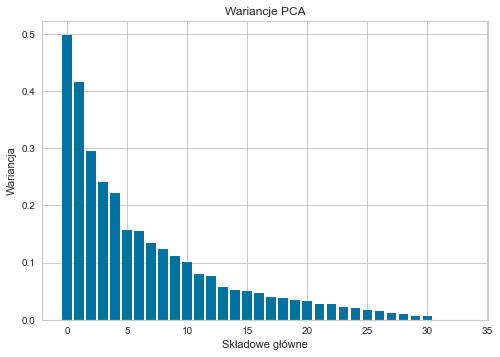

In [8]:
pca = PCA()
pca.fit(df)
variances = pca.explained_variance_
x = np.arange(len(variances))
plt.bar(x, variances)
plt.title('Wariancje PCA')
plt.xlabel('Składowe główne')
plt.ylabel('Wariancja')
plt.show()


In [9]:
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,22152.0,1.347183e-17,0.705392,-1.100283,-0.570920,-0.224552,0.667075,1.562608
col2,22152.0,1.011991e-16,0.644601,-1.012303,-0.605372,-0.117278,0.546055,1.264967
col3,22152.0,3.303806e-17,0.542401,-1.180256,-0.428361,-0.021276,0.411938,1.666148


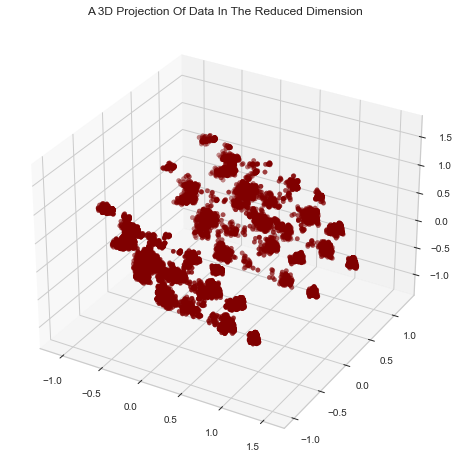

In [10]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

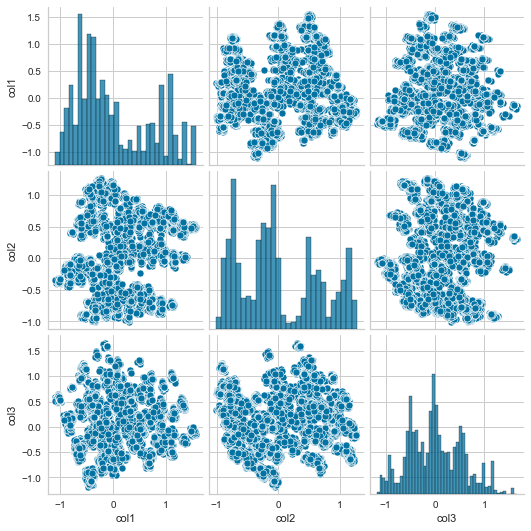

In [11]:
# wykresy zmiennych
df2=PCA_ds
sns.pairplot(df2)

## Poszukiwanie optymalnej liczby klastrów

In [12]:
def count_clustering_scores(X, cluster_num, model, score_fun):
   
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

### Kmeans

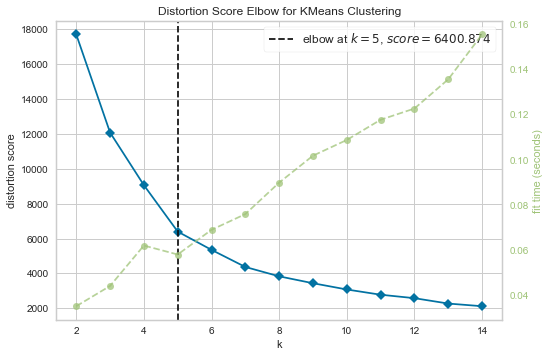

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
Elbow_M = KElbowVisualizer(KMeans(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

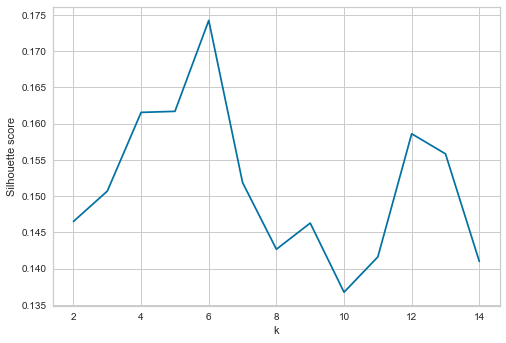

In [14]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 6

### Kmedoids

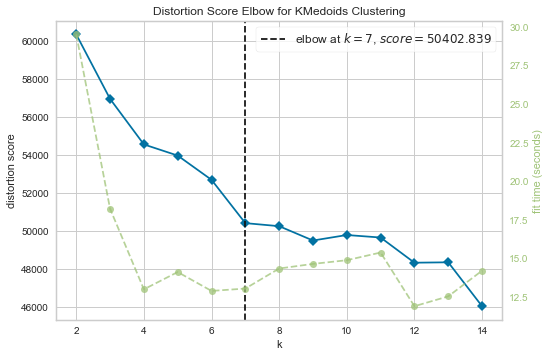

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
Elbow_M = KElbowVisualizer(KMedoids(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

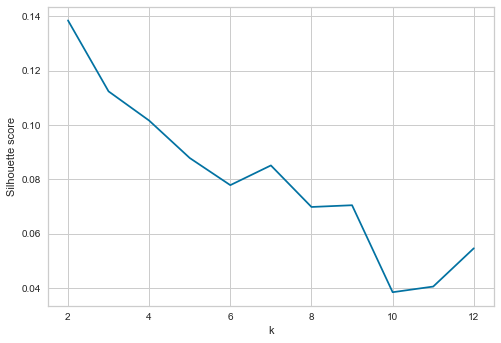

In [16]:
cluster_num_seq = range(2, 13)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMedoids, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 7 klastrów, a silhouette_score na 2

### AgglomerativeClustering

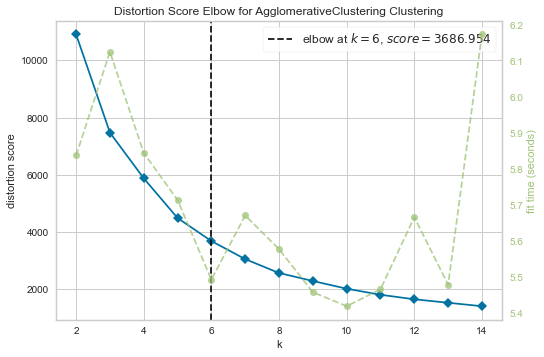

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

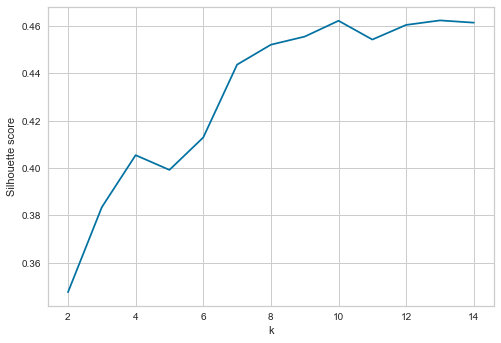

In [18]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 6 klastrów, a silhouette_score na 10

### Gap Statistics

In [19]:
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  

Optimal k is:  14


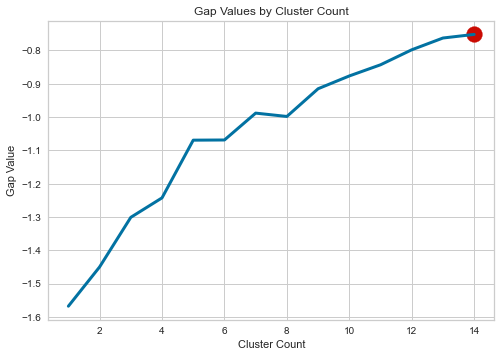

In [20]:
k, gapdf = optimalK(df, nrefs=3, maxClusters=15)
print('Optimal k is: ', k)
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

### Dendogram

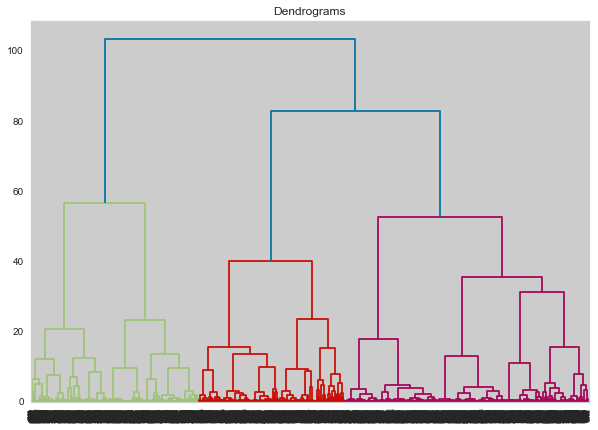

In [21]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

### AIC And BIC From GMMs

In [22]:
aic_score = {} 
bic_score = {}

for i in range(1,15): 
  gmm = GaussianMixture(n_components=i, random_state=0).fit(df)
  aic_score[i] = gmm.aic(df)
  bic_score[i] = gmm.bic(df)


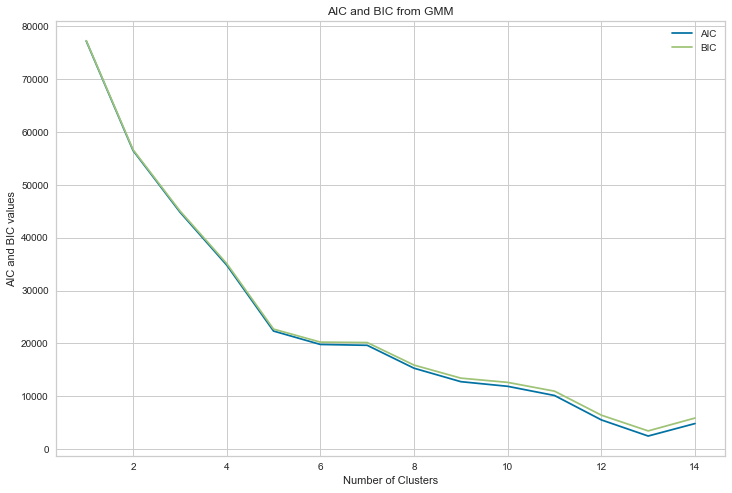

In [23]:
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

Wnioski: większośc testów sugeruje przyjęcie liczby z klastrów równej 5 lub jak największej. Wobec tego uznaliśmy właśnie 5 za optymalną liczbą klastrów.

# Clusterization

In [21]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(df)

### 1. Kmeans

In [22]:
k = 5 
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)
labels = kmeans.labels_

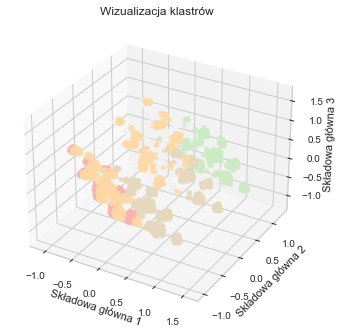

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 2. MiniBatchKMeans

In [24]:
miniBatchKmeans = MiniBatchKMeans(n_clusters= 5)
miniBatchKmeans.fit(df)
labels = miniBatchKmeans.labels_

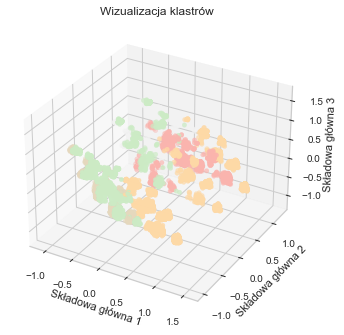

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 3. Agglomerative Clustering

In [26]:
AC = AgglomerativeClustering(n_clusters= 5)
AC.fit(df)
labels = AC.labels_

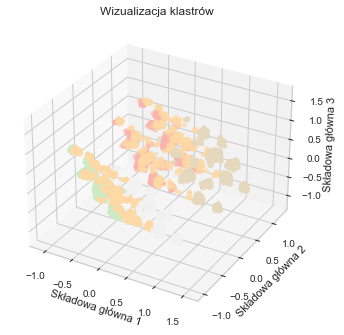

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 4. DBSCAN

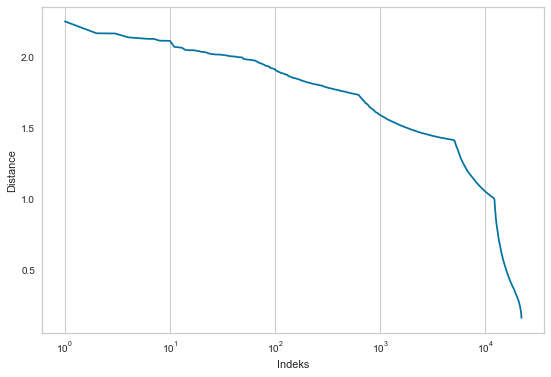

In [28]:
minPts = 68
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks')
plt.ylabel('Distance')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)
plt.xscale('log')
plt.grid(axis='y')
plt.show()

In [43]:
dbs = cluster.DBSCAN(eps=0.34, min_samples= minPts)
dbs.fit(df)
labels = dbs.labels_

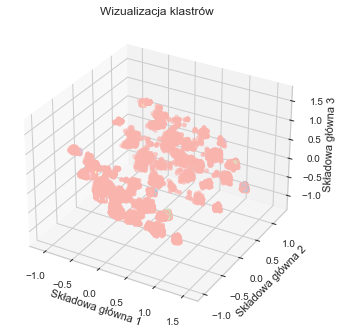

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

In [48]:
# Inicjalizacja modeli klastrujących
kmeans = KMeans(5)
mini_batch_kmeans = MiniBatchKMeans(n_clusters=5)
agg_clustering = AgglomerativeClustering(n_clusters=5)
dbscan = DBSCAN(eps=0.33, min_samples= minPts)

# Dopasowanie modeli klastrujących
kmeans.fit(df)
mini_batch_kmeans.fit(df)
agg_clustering.fit(df)
dbscan.fit(df)

# Przewidywanie klastrów
kmeans_labels = kmeans.labels_
mini_batch_kmeans_labels = mini_batch_kmeans.labels_
agg_clustering_labels = agg_clustering.labels_
dbscan_labels = dbscan.labels_

# Metryki oceny klastrów
kmeans_silhouette = silhouette_score(df, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(df, kmeans_labels)
mini_batch_kmeans_silhouette = silhouette_score(df, mini_batch_kmeans_labels)
mini_batch_kmeans_calinski = calinski_harabasz_score(df, mini_batch_kmeans_labels)
agg_clustering_silhouette = silhouette_score(df, agg_clustering_labels)
agg_clustering_calinski = calinski_harabasz_score(df, agg_clustering_labels)
dbscan_silhouette = silhouette_score(df, dbscan_labels)
dbscan_calinski = calinski_harabasz_score(df, dbscan_labels)

# Tworzenie tabeli podsumowującej
data = {
    'Metoda': ['KMeans', 'MiniBatchKMeans', 'Agglomerative Clustering', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, mini_batch_kmeans_silhouette, agg_clustering_silhouette, dbscan_silhouette],
    'Calinski-Harabasz Indedf': [kmeans_calinski, mini_batch_kmeans_calinski, agg_clustering_calinski, dbscan_calinski]
}

summary_table = pd.DataFrame(data)
print(summary_table)


                     Metoda  Silhouette Score  Calinski-Harabasz Indedf
0                    KMeans          0.161599               2683.451788
1           MiniBatchKMeans          0.133408               2166.216575
2  Agglomerative Clustering          0.142821               2387.008756
3                    DBSCAN         -0.176301                187.736549


Po wstępnej analizie stwierdziliśmy, że najlepiej wypada KMeans

## KMeans - dalsza analiza

Zauważmy, że przeważającą role podczas klasteryzacji pełni praca

In [94]:
def result(df, k, labels):
    """
    Funkcja tworzy dataframe zawierający mediany każdej kolumny z podziałem na klastry
    """
    result_df = pd.DataFrame(columns=df.columns)
    for cluster in range(5):
        cluster_elements = df[labels == cluster]
        cluster_medians = np.median(cluster_elements, axis=0)
        result_df.loc[cluster]=cluster_medians
    return result_df

def result_mean(df, k, labels):
    """
    Funkcja tworzy dataframe zawierający średnie każdej kolumny z podziałem na klastry
    """
    result_df = pd.DataFrame(columns=df.columns)
    for cluster in range(5):
        cluster_elements = df[labels == cluster]
        cluster_medians = np.mean(cluster_elements, axis=0)
        result_df.loc[cluster]=cluster_medians
    return result_df

def decode(df, prefix, dictionary):
    """
    Funkcja cofa proces normalizacji na tabeli wynikowej, aby móc odczytać dane
    """
    for column in df.columns:
        if column.startswith(prefix):
            df[column] *= 10/7
        df[column] *= (dictionary[column][1] - dictionary[column][0])
        df[column] += dictionary[column][0]
    return df

def importance_score(df, k, labels):
    """
    Funkcja liczy importance_score dla kazdej kolumny
    """
    n_samples, n_features = df.shape
    importance_df = pd.DataFrame(columns=df.columns)
    cluster_centers = np.zeros((k, n_features))
    for cluster_id in range(k):
        cluster_points = df.iloc[labels == cluster_id]
        cluster_centers[cluster_id] = np.mean(cluster_points, axis=0)

    importance_scores = np.zeros(n_features)
    for i in range(n_samples):
        cluster_center = cluster_centers[labels[i]]
        importance_scores += (df.iloc[i] - cluster_center) ** 2

    importance_scores /= n_samples

    for i, score in enumerate(importance_scores):
        print(f"Importance score for {df.columns[i]}: {score}")
    importance_df.loc[0]=importance_scores
    
    return importance_df

def filter_columns_by_prefix(df, prefix):
    columns_with_prefix = [col for col in df.columns if col.startswith(prefix)]
    return columns_with_prefix

def sum_one_hot_columns(importance_df):
    """
    Funkcja sumuje importance score kolumn, które zostały poddane procesowi one hot encoding
    """
    importance_sum = importance_df
    jobs = filter_columns_by_prefix(importance_sum, "job")
    marital = filter_columns_by_prefix(importance_sum, "marital")
    education = filter_columns_by_prefix(importance_sum, "education")
    poutcome = filter_columns_by_prefix(importance_sum, "poutcome")
    importance_sum['job'] = importance_sum[jobs].sum(axis=1)
    importance_sum['marital'] = importance_sum[marital].sum(axis=1)
    importance_sum['education'] = importance_sum[education].sum(axis=1)
    importance_sum['poutcome'] = importance_sum[poutcome].sum(axis=1)
    importance_sum.drop(jobs, axis = 'columns', inplace = True)
    importance_sum.drop(marital, axis = 'columns', inplace = True)
    importance_sum.drop(education, axis = 'columns', inplace = True)
    importance_sum.drop(poutcome, axis = 'columns', inplace = True)
    
    return importance_sum, jobs, marital, education, poutcome

    

In [50]:
KM = KMeans(5)
y = KM.fit_predict(df)
labels = KM.labels_

In [51]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.467532,0.0,0.091908,0.0,0.0,0.833333,0.636364,0.221274,0.15,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.272727,0.0,0.044147,0.0,0.0,0.866667,0.636364,0.091267,0.15,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.233766,0.0,0.059292,0.0,0.0,0.433333,0.636364,0.067630,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.233766,0.0,0.722098,0.0,0.0,0.266667,0.454545,0.084045,0.00,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246753,0.0,0.057214,1.0,1.0,0.500000,0.454545,0.139199,0.00,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
result_df = result(df,5, labels)
result_df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.207792,0.0,0.061519,1.0,0.0,0.500000,0.363636,0.115561,0.05,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.207792,0.0,0.071789,0.0,0.0,0.533333,0.454545,0.114248,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.350649,0.0,0.064242,1.0,0.0,0.466667,0.454545,0.110965,0.05,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.285714,0.0,0.073398,0.0,0.0,0.533333,0.545455,0.106369,0.05,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.298701,0.0,0.066568,1.0,0.0,0.500000,0.454545,0.112278,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [117]:
decoded_df = decode(result_df,'job', decode_dict)
decoded_df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,34.0,0.0,330.0,1.0,0.0,16.0,5.0,186.0,2.0,-1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,41.0,0.0,453.0,1.0,0.0,16.0,6.0,179.0,2.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,44.0,0.0,418.0,1.0,0.0,15.0,6.0,175.0,2.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,34.0,0.0,559.5,0.0,0.0,17.0,6.0,183.5,2.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,40.0,0.0,583.5,0.0,0.0,17.0,7.0,169.0,2.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
importance_df = importance_score(df, k, labels)
importance_df.head()

Importance score for age: 0.017058581109497466
Importance score for default: 0.01749228094592434
Importance score for balance: 0.011606817565354508
Importance score for housing: 0.24364202037794486
Importance score for loan: 0.13401020242976952
Importance score for day: 0.07679332234220493
Importance score for month: 0.04673929788633985
Importance score for duration: 0.02223059379878669
Importance score for campaign: 0.01613656332391318
Importance score for pdays: 0.05569625517324781
Importance score for job_admin.: 0.0954341558891176
Importance score for job_blue-collar: 0.13681919589196023
Importance score for job_entrepreneur: 0.03121608124015803
Importance score for job_housemaid: 0.02633255557899401
Importance score for job_management: 0.10205124191947994
Importance score for job_retired: 0.04548303993769077
Importance score for job_self-employed: 0.03201551112288619
Importance score for job_services: 0.07912869073466865
Importance score for job_student: 0.02006418759888807
Import

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.017059,0.017492,0.011607,0.243642,0.13401,0.076793,0.046739,0.022231,0.016137,0.055696,...,0.086368,0.011508,0.020159,0.007993,0.037498,0.220717,0.059367,0.094126,0.038488,0.032439


In [56]:
importance_sum, jobs, marital, education, poutcome = sum_one_hot_columns(importance_df)
importance_sum.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,contact_cellular,contact_telephone,job,marital,education,poutcome
0,0.017059,0.017492,0.011607,0.243642,0.13401,0.076793,0.046739,0.022231,0.016137,0.055696,0.220717,0.059367,0.738353,0.201868,0.077158,0.165054


Jobs zdecydowanie najbardziej wpływają na klastry zatem zmniejszamy ich wagę

In [57]:
weights = {name: 0.7 for name in jobs}

df_scaled = df.copy()
for column, weight in weights.items():
    df_scaled[column] *= weight

df_test_scaled = df_test.copy()
for column, weight in weights.items():
    df_test_scaled[column] *= weight


In [58]:
df_scaled.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.467532,0.0,0.091908,0.0,0.0,0.833333,0.636364,0.221274,0.15,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.272727,0.0,0.044147,0.0,0.0,0.866667,0.636364,0.091267,0.15,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.233766,0.0,0.059292,0.0,0.0,0.433333,0.636364,0.067630,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.233766,0.0,0.722098,0.0,0.0,0.266667,0.454545,0.084045,0.00,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246753,0.0,0.057214,1.0,1.0,0.500000,0.454545,0.139199,0.00,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
KM2 = KMeans(5)
y2 = KM2.fit_predict(df_scaled)
labels = KM2.labels_

In [60]:
result_df2 = result(df_scaled, 5, labels)
result_df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.350649,0.0,0.064167,1.0,0.0,0.466667,0.454545,0.110309,0.05,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.298701,0.0,0.066568,1.0,0.0,0.500000,0.454545,0.112278,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.207792,0.0,0.061396,1.0,0.0,0.500000,0.363636,0.116218,0.05,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.207792,0.0,0.071913,0.0,0.0,0.533333,0.454545,0.114248,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.298701,0.0,0.073546,0.0,0.0,0.533333,0.545455,0.106369,0.05,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
decoded_df2 = decode(result_df2,'job', decode_dict)
decoded_df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,45.0,0.0,404.5,1.0,0.0,15.0,6.0,176.0,2.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41.0,0.0,453.0,1.0,0.0,16.0,6.0,179.0,2.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,34.0,0.0,348.5,1.0,0.0,16.0,5.0,185.0,2.0,-1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,34.0,0.0,561.0,0.0,0.0,17.0,6.0,182.0,2.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,41.0,0.0,594.0,0.0,0.0,17.0,7.0,170.0,2.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [62]:
importance_df2 = importance_score(df_scaled,5,labels)
importance_df2.head()

Importance score for age: 0.017063274735588694
Importance score for default: 0.01749226655690833
Importance score for balance: 0.01160168238155272
Importance score for housing: 0.24313530400603486
Importance score for loan: 0.13396483147264687
Importance score for day: 0.07678580955564712
Importance score for month: 0.04670285581574225
Importance score for duration: 0.02223006208930881
Importance score for campaign: 0.01613804785873061
Importance score for pdays: 0.05570393121957648
Importance score for job_admin.: 0.04693889240133105
Importance score for job_blue-collar: 0.067650685703161
Importance score for job_entrepreneur: 0.015293255662444768
Importance score for job_housemaid: 0.012913141809263793
Importance score for job_management: 0.050987922133377314
Importance score for job_retired: 0.022315730305622904
Importance score for job_self-employed: 0.015689656397677686
Importance score for job_services: 0.03885230520958394
Importance score for job_student: 0.009841820035790913
Im

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.017063,0.017492,0.011602,0.243135,0.133965,0.076786,0.046703,0.02223,0.016138,0.055704,...,0.087287,0.013873,0.013041,0.010113,0.036939,0.219747,0.059346,0.094119,0.038492,0.032424


In [63]:
importance_sum2, jobs, marital, education, poutcome = sum_one_hot_columns(importance_df2)
importance_sum2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,contact_cellular,contact_telephone,job,marital,education,poutcome
0,0.017063,0.017492,0.011602,0.243135,0.133965,0.076786,0.046703,0.02223,0.016138,0.055704,0.219747,0.059346,0.363993,0.203423,0.073968,0.165035


In [64]:
from collections import Counter

counter = Counter(labels)

for cluster, count in counter.items():
    print("Cluster", cluster, "has", count, "points.")

Cluster 1 has 6796 points.
Cluster 3 has 3129 points.
Cluster 2 has 4886 points.
Cluster 4 has 3639 points.
Cluster 0 has 3702 points.


### X test

In [78]:
y_test = KM2.predict(df_test_scaled)
result_df_test_scaled = result(df_test_scaled, 5, y_test)
decoded_df_test_scaled = decode(result_df_test_scaled,'job', decode_dict)
decoded_df_test_scaled.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,45.0,0.0,408.0,1.0,0.0,15.0,6.0,179.0,2.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0,0.0,517.0,0.0,0.0,16.0,6.0,179.0,2.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,41.0,0.0,583.5,0.0,0.0,17.0,7.0,168.5,2.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,41.0,0.0,433.0,1.0,0.0,16.0,6.0,182.0,2.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,35.0,0.0,342.0,1.0,0.0,16.0,5.0,184.0,2.0,-1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [95]:
result_df_test_scaled = result_mean(df_test_scaled, 5, y_test)
decoded_df_test_scaled = decode(result_df_test_scaled,'job', decode_dict)
decoded_df_test_scaled.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,45.852954,0.024945,1169.721663,0.559737,0.139606,15.445077,6.016193,250.301969,2.704158,31.315974,...,0.112910,0.894967,0.000000,0.000000,0.105033,0.487090,0.109409,0.084902,0.034573,0.017068
1,36.477284,0.017356,1403.685043,0.454313,0.108729,15.955079,6.207759,258.386932,2.537519,36.377744,...,0.775906,0.000510,0.000000,0.935171,0.064319,0.752425,0.041348,0.123532,0.039306,0.054620
2,42.837511,0.017010,1554.205013,0.469561,0.139660,16.244405,6.603850,238.220233,2.742614,34.757386,...,0.000000,0.000000,0.000000,0.944047,0.055953,0.757833,0.060430,0.119069,0.038944,0.043868
3,42.306393,0.013752,1185.858142,0.622678,0.199517,15.910736,6.144029,249.268758,2.645356,38.960193,...,0.000000,0.000000,0.993727,0.000000,0.006273,0.620507,0.061279,0.118938,0.036671,0.028227
4,36.974498,0.020401,1004.445767,0.586875,0.171710,15.752465,5.865692,257.246175,2.440666,40.279157,...,0.683441,0.000000,0.965998,0.000000,0.034002,0.639578,0.047603,0.105746,0.051003,0.030602


In [99]:
decoded_df_test_scaled.iloc[:, 13:21].head()

,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0.081838,0.039387,0.115098,0.017943,0.045514,0.006565,0.028884,0.035449
1,0.008678,0.520674,0.019398,0.072996,0.017866,0.052067,0.160796,0.029607
2,0.015667,0.603850,0.047001,0.061773,0.015667,0.004029,0.121307,0.015667
3,0.020989,0.048010,0.056212,0.029916,0.145476,0.001689,0.213752,0.030157
4,0.013941,0.045903,0.025502,0.019721,0.157429,0.046923,0.248895,0.036722


In [91]:
from collections import Counter

counter = Counter(y_test)

for cluster, count in counter.items():
    print("Cluster", cluster, "has", count, "points.")

Cluster 4 has 2941 points.
Cluster 1 has 1959 points.
Cluster 3 has 4145 points.
Cluster 0 has 2285 points.
Cluster 2 has 2234 points.
